# Parkinson's Law
## Extending the Model

 ### Hierarchy

I will implement the general pyramid hierarchy that I discussed and began exploring in the week 5-6 logbook.

### The Cabinet of the United Kingdom

Though perhaps ambitious, I plan to research the specific contextual case of the UK cabinet and try to implement its approximate structure in terms of numbers and hierarchy within the block diagram simulations. I could see if there is a time-limit or similar quantity that restricts cabinet meetings and reasonably quantise this, such that it is represented by a specific number of discrete iterations. Maybe then, I could find relevant data on a particular topic on which it was necessary for the UK cabinet to reach an agreement and find the degree to which my simulation matches the outcome.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

### Hierarchy Functions

In [2]:
p = 6
N = 5**2

def hierarchy():
    """ 
        Function creates a pyramid of opinion state weightings
        Inputs:  None
        Returns: pyramid"""
    H = int(np.sqrt(N))
    weight = np.linspace(N/p,1,H)
    pyramid = np.zeros((H, 2*H-1))
    for i in range(0,H):
        pyramid[i] = np.round(weight[i],1)*np.ones(2*H-1)
        width = 2*H-1
        if width%2 == 0:
            start = (width/2) - i
            end = (width/2) + i
            pyramid[i][:start] = np.zeros(width/2 - (i+1))
            pyramid[i][end:] = np.zeros(width/2 - (i+1))
        else:
            start = int((width+1)/2 - i - 1)
            end = int((width+1)/2 + i)
            pyramid[i][:start] = np.zeros(int((width+1)/2) - i - 1)
            pyramid[i][end:] = np.zeros(int(((width+1)/2) - (i+1)))
    return pyramid

def getOpinions_weighted(hierarchy):
    """
        Function randomly assigns opinion states to committee members
        Inputs:  hierarchy
        Returns: committee"""
    pyramid = hierarchy()
    sum_weights = np.sum(pyramid)
    committee = np.zeros((2,N))
    n = 0
    for i in range(0,N):
        committee[0][i] = random.randint(0,1)
    for i in range(len(pyramid[0,:])):
        for j in range(len(pyramid[:,0])):
            if pyramid[j][i] != 0:
                committee[1][n] = pyramid[j][i]
                n += 1
    return committee, sum_weights

getOpinions_weighted(hierarchy)

def newOpinions_weighted(committee, links, N, sum_weights):
    """
       Function re-evaluates opinion states if average opinion of connected nodes exceeds threshold
       Inputs:  committee, links, N, sum_weights
       Returns: links"""
    # Create random order
    order = 100*np.ones(N)
    n = 0
    while n < N:
        y = random.randint(0,N-1)
        if y not in order:
            order[n] = y
            n += 1
    
    for i in range(0,N):
        x = int(order[i])
        ops0 = np.zeros(k)
        ops1 = np.zeros(k)
        if k == N:
            z = k-1
        else:
            z = k
        for j in range(1,z):
            node = int(links[x][z])
            if committee[0][node] == 0:
                ops0[j] = committee[1][node]
            elif committee[0][node] == 1:
                ops1[j] = committee[1][node]
        no = np.sum(ops0)/(sum_weights*k/N)
        yes = np.sum(ops1)/(sum_weights*k/N)
        if no >= h:
            committee[0][x] = int(0)
        elif yes >= h:
            committee[0][x] = int(1)
        else:
            continue
    return committee

### Usual Functions

In [3]:
def getLinks(N):
    """
       Function randomly assigns links between each node and its k nearest neighbours
       Inputs:  N
       Returns: links"""
    if N == k:
        links = np.zeros([N,k])
        x = k
    else:
        links = np.zeros([N,k+1])
        x = k+1
    
    for i in range(0,N):
        links[i][0] = i
    
    for i in range(0,N):
        for j in range(1,x):
            n = 0
            while n < 1:
                if N == k:
                    choice = random.choice(range(0,N+1))
                else:
                    choice = random.choice(range(0,N))
                if choice != i and choice not in links[i]:
                    links[i][j] = int(choice)
                    n += 1
                else:
                    continue
    return links

def rewire(links):
    """
       Function rewires links with a probability 'e'
       Inputs:  links
       Returns: links"""
    if k == N:
        x = k
    else:
        x = k+1
    for i in range(0,N):
        for j in range(1,x):
            # Perform rewiring with likelihood e
            if random.random() >= (1-e):
                n = 0
                while n < 1:
                    choice = random.choice(range(0,N))
                    if choice != i and choice not in links[i]:
                        links[i][j] = int(choice)
                        n += 1
                    else:
                        continue
    graph = createGraph(links)
    visited = []
    DFS(visited,graph,0)
    for i in range(0,N):
        if i not in visited:
            rewire(links)
    return links

def createGraph(links):
    """
       Function creates a dictionary representation of array 'links' (manual test stage)
       Inputs:
       links    Adjacency matrix that stores connections between nodes
       Returns:
       graph   'Links' converted into a dictionary"""
    if k == N:
        x = k
    else:
        x = k+1
    graph = {}
    for i in range(0,N):
        graph[i] = i
        connections = np.zeros(k)
        for j in range(1,x):
            connections[j-1] = links[i][j] 
        graph[graph[i]] = connections
    return graph

def DFS(visited, graph, node):
    """
       Function traverses graph via connections and stores each node it visits
       Inputs:
       Graph    Any graph
       Node     Start node
       Visited  Array of visited nodes (initially none)
       Outputs:
       Visited"""
    if node not in visited:
        visited.append(node)
        for neighbour in graph[int(node)]:
            DFS(visited, graph, neighbour)
    return visited

### Simulating Hierarchy and Obtaining a Figure

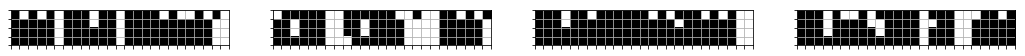

In [4]:
k = 8
e = 0.1
h = 0.6

fig1 = plt.figure(figsize=(18,18))

# Establish random distribution of opinions and initial connections
committee, sum_weights = getOpinions_weighted(hierarchy)
links = getLinks(N)

# Initialise 2D opinion array
opinions = np.zeros((4,N))
opinions[0] = committee[0]

# Iterate re-evaluation and re-wiring 3 times
for i in range(1,4):
    committee = newOpinions_weighted(committee, links, N, sum_weights)
    opinions[i] = committee[0]
    links = rewire(links)
    
a = fig1.add_subplot(1,4,1)
plt.imshow(opinions, cmap='Greys')
a = plt.gca()
a.set_xticks(np.arange(-.5,N,1))
a.set_yticks(np.arange(-.5,4,1))
a.set_xticklabels('')
a.set_yticklabels('')
a.grid()

# Establish random distribution of opinions and initial connections
committee, sum_weights = getOpinions_weighted(hierarchy)
links = getLinks(N)

# Initialise 2D opinion array
opinions = np.zeros((4,N))
opinions[0] = committee[0]

# Iterate re-evaluation and re-wiring 3 times
for i in range(1,4):
    committee = newOpinions_weighted(committee, links, N, sum_weights)
    opinions[i] = committee[0]
    links = rewire(links)
    
b = fig1.add_subplot(1,4,2)
plt.imshow(opinions, cmap='Greys')
b = plt.gca()
b.set_xticks(np.arange(-.5,N,1))
b.set_yticks(np.arange(-.5,4,1))
b.set_xticklabels('')
b.set_yticklabels('')
b.grid()

# Establish random distribution of opinions and initial connections
committee, sum_weights = getOpinions_weighted(hierarchy)
links = getLinks(N)

# Initialise 2D opinion array
opinions = np.zeros((4,N))
opinions[0] = committee[0]

# Iterate re-evaluation and re-wiring 3 times
for i in range(1,4):
    committee = newOpinions_weighted(committee, links, N, sum_weights)
    opinions[i] = committee[0]
    links = rewire(links)
    
c = fig1.add_subplot(1,4,3)
plt.imshow(opinions, cmap='Greys')
c = plt.gca()
c.set_xticks(np.arange(-.5,N,1))
c.set_yticks(np.arange(-.5,4,1))
c.set_xticklabels('')
c.set_yticklabels('')
c.grid()

# Establish random distribution of opinions and initial connections
committee, sum_weights = getOpinions_weighted(hierarchy)
links = getLinks(N)

# Initialise 2D opinion array
opinions = np.zeros((4,N))
opinions[0] = committee[0]

# Iterate re-evaluation and re-wiring 3 times
for i in range(1,4):
    committee = newOpinions_weighted(committee, links, N, sum_weights)
    opinions[i] = committee[0]
    links = rewire(links)
    
d = fig1.add_subplot(1,4,4)
plt.imshow(opinions, cmap='Greys')
d = plt.gca()
d.set_xticks(np.arange(-.5,N,1))
d.set_yticks(np.arange(-.5,4,1))
d.set_xticklabels('')
d.set_yticklabels('')
d.grid()

# Plot the four block diagrams, created under equal conditions, for comparison
plt.show()

In [5]:
def getOpinions_weighted(hierarchy, S_i):
    """
        Function randomly assigns opinion states to committee members
        Inputs:  hierarchy, S_i
        Returns: committee"""
    order = np.ones(N)*100
    for i in range(0,N):
        n = 0
        while n < 1:
            choice = random.randint(0,N-1)
            if choice not in order:
                order[i] = choice
                n += 1
            else:
                continue
    pyramid = hierarchy()
    sum_weights = np.sum(pyramid)
    committee = np.zeros((2,N))
    n = 0
    for i in range(0,S_i):
        committee[0][int(order[i])] = 1
    for i in range(len(pyramid[0,:])):
        for j in range(len(pyramid[:,0])):
            if pyramid[j][i] != 0:
                committee[1][n] = pyramid[j][i]
                n += 1
    return committee, sum_weights

No handles with labels found to put in legend.


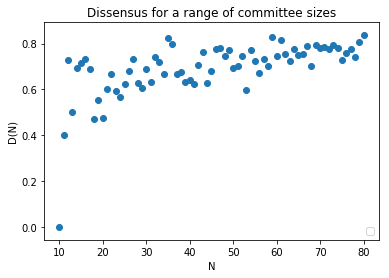

In [6]:
iters = 40

D_N = np.zeros(iters - k-1)
for N in range(k+2,iters):
    d_N = np.zeros(N)

    for i in range(0,N):
        S_i = i
        committee, sum_weights = getOpinions_weighted(hierarchy, S_i)
        links = getLinks(N)

        opinions = np.zeros((4,N))

        for j in range(1,4):
            committee = newOpinions_weighted(committee, links, N, sum_weights)
            opinions[j] = committee[0]
            links = rewire(links)

        S_f = np.sum(np.where(committee==1,1,0))

        y = np.array((S_f, N-S_f))
        x = 1 - np.max(y)/N
        if x > 0:
            x = 1
        elif x == 0:
            x = 0
        else:
            x = 0
        d_N[i] = x
     
    D = np.mean(d_N)
    D_N[N-k-1] = D
 
N = np.zeros(iters - k-1)
for i in range(k+2,iters+1):
    N[i - k-2] = i
    
plt.scatter(N, D_N)
plt.title('Dissensus for a range of committee sizes')
plt.xlabel('N')
plt.ylabel('D(N)')

### UK Cabinet Research

- 1 prime minister + 21 cabinet ministers = 22 committee members
- 'The cabinet is the ultimate decision-making body within government.' - https://publications.parliament.uk/pa/ld201314/ldselect/ldconst/46/4605.htm
- 'Records of cabinet meeetings are confidential and only transferred to the national archives after 20 years.' - https://www.nationalarchives.gov.uk/cabinetpapers/cabinet-gov/meetings-papers.htm?WT.ac=Meetings%20and%20papers

After sifting through some WWII archives a little aimlessly, I arrived at a more contemporary case study to consider: Brexit. The cabinet had to come to a decision on whether or not they wanted a deal by the fixed deadline October 31st. 

On October 17th, Boris Johnson and EU leaders agreed on a new Brexit deal. By October 31st, the proposed deadline, a parliamentary agreement was not reached.

I plan to first take the Commons, an elected body consisting of 650 members and simulate this process, using each day as one iteration. I could then take the cabinet and see if there are different results for this much smaller committee size. Further, I might experiment with different hierarchies and committee sizes to find a peak efficiency. 

### Adjusting the Hierarchical Structure

In [7]:
N = 22 # Prime Minister and 21 cabinet ministers
p = 11 # Selected such that Prime Minister's opinion holds minimally more weight than that of other ministers

def hierarchy():
    """ 
       Function creates a pyramid of opinion state weightings
       Inputs:  None
       Returns: pyramid"""
    H = 2
    weight = np.linspace(N/p,1,H)
    pyramid = np.zeros((H, 21))
    for i in range(0,H):
        pyramid[i] = np.round(weight[i],1)*np.ones(21)
        width = 21
        if i == 1:
            pyramid[i] = np.ones(21)
        else:
            start = int((width+1)/2 - i - 1)
            end = int((width+1)/2 + i)
            pyramid[i][:start] = np.zeros(int((width+1)/2) - i - 1)
            pyramid[i][end:] = np.zeros(int(((width+1)/2) - (i+1)))
    return pyramid

pyramid = hierarchy()
print(pyramid)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


### A non-reciprocal relationship

I will adjust the link formation and rewiring subroutines, so that any connections with the Prime Minister are non-reciprocal, i.e. the PM's opinion is included in the re-evaluation of opinion states by other nodes, but the PM's own opinion is not influenced by that of other nodes.

In [8]:
def getLinks(N, committee):
    """
       Function randomly assigns links between each node and its k nearest neighbours
       Inputs:  N, committee
       Returns: links"""
    if N == k:
        links = np.zeros([N,k])
        x = k
    else:
        links = np.zeros([N,k+1])
        x = k+1
    
    for i in range(0,N):
        links[i][0] = i
    
    for i in range(0,N):
        # Only link the node with higher weighting (the PM) to itself
        if committee[1][i] == 2:
            links[i][:] = i
        # Connect other nodes as usual
        else:
            for j in range(1,x):
                n = 0
                while n < 1:
                    if N == k:
                        choice = random.choice(range(0,N+1))
                    else:
                        choice = random.choice(range(0,N))
                    if choice != i and choice not in links[i]:
                        links[i][j] = int(choice)
                        n += 1
                    else:
                        continue
    return links

def rewire(links, committee):
    """
       Function rewires links with a probability 'e'
       Inputs:  links, committee
       Returns: links"""
    if k == N:
        x = k
    else:
        x = k+1
    rewire = True
    for i in range(0,N):
        # Do not rewire PM's connections
        if committee[1][i] == 2:
            rewire = False
        if rewire == True:
            for j in range(1,x):
                # Perform rewiring with likelihood e
                if random.random() >= (1-e):
                    n = 0
                    while n < 1:
                        choice = random.choice(range(0,N))
                        if choice != i and choice not in links[i]:
                            links[i][j] = int(choice)
                            n += 1
                        else:
                            continue
    graph = createGraph(links)
    visited = []
    DFS(visited,graph,0)
    for i in range(0,N):
        if i not in visited:
            rewire(links)
    return links

### Hierarchical Opinion State Functions

In [9]:
def getOpinions_weighted(hierarchy):
    """
        Function randomly assigns opinion states to committee members
        Inputs:  None
        Returns: committee"""
    pyramid = hierarchy()
    sum_weights = np.sum(pyramid)
    committee = np.zeros((2,N))
    n = 0
    for i in range(0,N):
        committee[0][i] = random.randint(0,1)
    for i in range(len(pyramid[0,:])):
        for j in range(len(pyramid[:,0])):
            if pyramid[j][i] != 0:
                committee[1][n] = pyramid[j][i]
                n += 1
    return committee, sum_weights

def newOpinions_weighted(committee, links, N, sum_weights):
    """
       Function re-evaluates opinion states if average opinion of connected nodes exceeds threshold
       Inputs:  committee, links
       Returns: links"""
    # Create random order
    order = 100*np.ones(N)
    n = 0
    while n < N:
        y = random.randint(0,N-1)
        if y not in order:
            order[n] = y
            n += 1
    
    for i in range(0,N):
        x = int(order[i])
        ops0 = np.zeros(k)
        ops1 = np.zeros(k)
        if k == N:
            z = k-1
        else:
            z = k
        for j in range(1,z):
            node = int(links[x][z])
            if committee[0][node] == 0:
                ops0[j] = committee[1][node]
            elif committee[0][node] == 1:
                ops1[j] = committee[1][node]
        no = np.sum(ops0)/(sum_weights*k/N)
        yes = np.sum(ops1)/(sum_weights*k/N)
        if no >= h:
            committee[0][x] = int(0)
        elif yes >= h:
            committee[0][x] = int(1)
        else:
            continue
    return committee

### Simulating and Obtaining Figures for Case Study

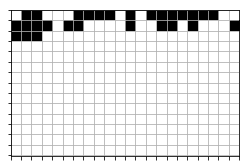

In [30]:
k = 8
e = 0.1
h = 0.6

fig1 = plt.figure(figsize=(68,68))

# Establish random distribution of opinions and initial connections
committee, sum_weights = getOpinions_weighted(hierarchy)
links = getLinks(N, committee)

# Initialise 2D opinion array
opinions = np.zeros((14,N))
opinions[0] = committee[0]

# Iterate re-evaluation and re-wiring 3 times
for i in range(1,14):
    committee = newOpinions_weighted(committee, links, N, sum_weights)
    opinions[i] = committee[0]
    links = rewire(links, committee)
    
a = fig1.add_subplot(1,14,1)
plt.imshow(opinions, cmap='Greys')
a = plt.gca()
a.set_xticks(np.arange(-.5,N,1))
a.set_yticks(np.arange(-.6,14,1))
a.set_xticklabels('')
a.set_yticklabels('')
a.grid()


Interestingly, the cell above gives a range of different outcomes, so I will attempt to find the average outcome over 100 trials below. By average outcome, I mean average fraction of nodes that share their opinion with the majority.

In [62]:
avgs = np.zeros(100)
for x in range(0,100):
    # Establish random distribution of opinions and initial connections
    committee, sum_weights = getOpinions_weighted(hierarchy)
    links = getLinks(N, committee)

    # Initialise 2D opinion array
    opinions = np.zeros((14,N))
    opinions[0] = committee[0]

    # Iterate re-evaluation and re-wiring 3 times
    for i in range(1,14):
        committee = newOpinions_weighted(committee, links, N, sum_weights)
        opinions[i] = committee[0]
        links = rewire(links, committee)
    avgs[x] = np.abs(np.sum(np.where(committee[0]==0,1,0))-np.sum(np.where(committee[0]==1,1,0)))/N
avg = np.mean(avgs)
print(avg)

0.8481818181818181


### Takeaways

The process of writing the programs necessary to explore that which I wanted to in this project, in particular, the elements that take the base project description a bit further has taught me a great deal about computational physics, which aspects interest me the most and how I work best. 

I found that the greatest challenge was the broad task of turning a problem to which I had a logical solution into code that worked, but that my skills in this area developed a lot throughout the process and I was much more effective at it by the end. 

I most enjoyed having the essential functions written and available for refinement, so that they could be applied to different models and used to answer questions that came to me as I progressed.